In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")


# 1. train.csv / test.csv : Diabetes 데이터


* Pregnancies : 임신횟수
* Glucose : 포도당 농도
* BloodPressure : 혈압
* SkinThickness : 피부두께
* Insulin : 인슐린
* BMI : 체질량지수
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

In [3]:
train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


In [4]:
train.shape

(652, 10)

In [5]:
test.shape

(116, 9)

In [6]:
submission.shape

(116, 2)

<AxesSubplot:>

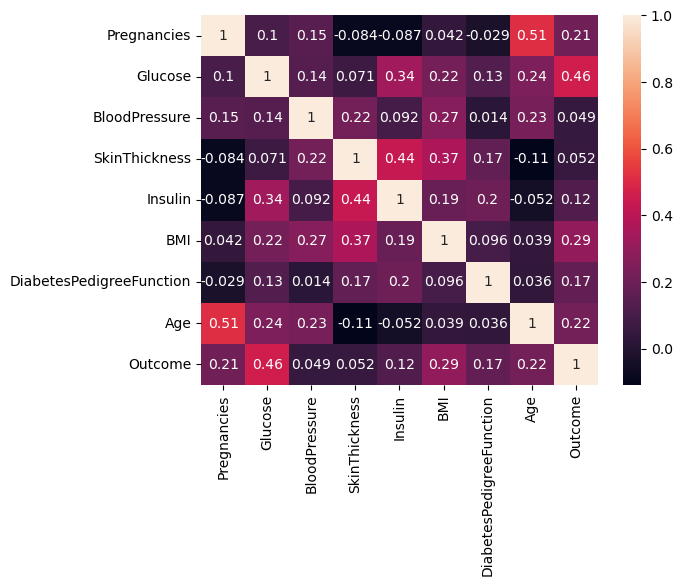

In [7]:
sns.heatmap(train.corr(), annot = True)

# 독립변수, 종속변수로 나눠주기

문자열은 머신러닝에서 사용할 수 없으므로 제거합니다.

In [9]:
x_train = train.drop(columns=['ID', 'Outcome'])
y_train = train['Outcome']

test = test.drop(columns = ['ID'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


In [10]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


In [13]:
train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.103449,0.148058,-0.084128,-0.087169,0.042233,-0.028958,0.511983,0.211340
Glucose,0.103449,1.000000,0.142046,0.071173,0.336526,0.224301,0.125244,0.242086,0.460108
BloodPressure,0.148058,0.142046,1.000000,0.218961,0.091818,0.265858,0.014207,0.225234,0.049459
SkinThickness,-0.084128,0.071173,0.218961,1.000000,0.436097,0.365557,0.170572,-0.108915,0.052094
Insulin,-0.087169,0.336526,0.091818,0.436097,1.000000,0.189895,0.201508,-0.052231,0.123246
BMI,0.042233,0.224301,0.265858,0.365557,0.189895,1.000000,0.095714,0.038796,0.294390
DiabetesPedigreeFunction,-0.028958,0.125244,0.014207,0.170572,0.201508,0.095714,1.000000,0.035520,0.173584
Age,0.511983,0.242086,0.225234,-0.108915,-0.052231,0.038796,0.035520,1.000000,0.218183
Outcome,0.211340,0.460108,0.049459,0.052094,0.123246,0.294390,0.173584,0.218183,1.000000


<AxesSubplot:>

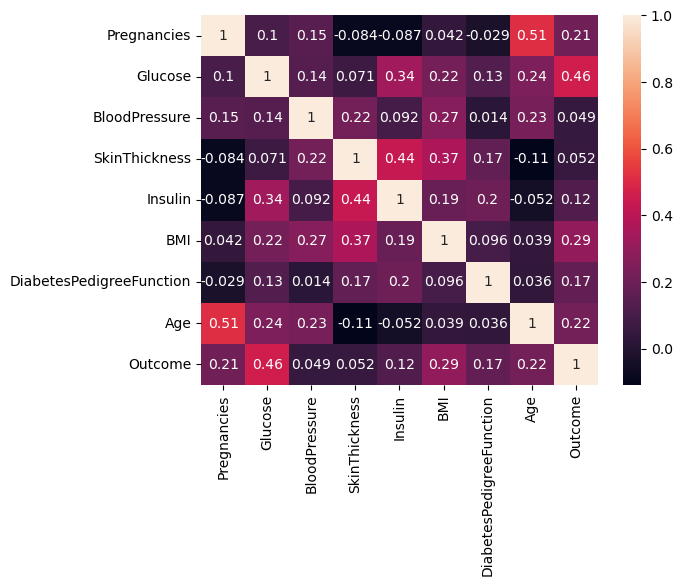

In [17]:
sns.heatmap(train.corr(), annot = True)

NameError: name 'pregnancies' is not defined

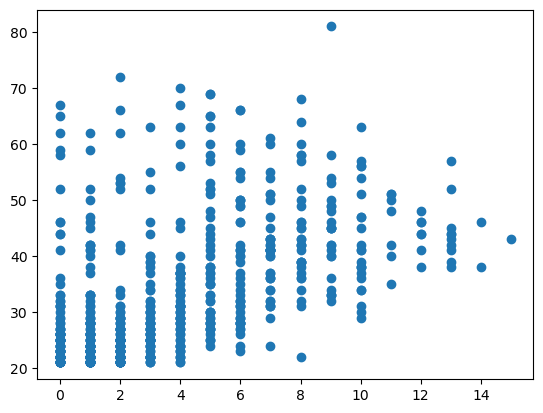

In [34]:
plt.scatter(train['Pregnancies'],train['Age'])

In [8]:
for i in x_train.columns:
    sns.displot(train[i], kde=False, bins=100)

NameError: name 'x_train' is not defined

In [42]:
train[['Age','BMI']].groupby('BMI').mean()

,Age
BMI,
0.0,30.428571
18.2,23.000000
18.4,27.000000
19.1,21.000000
19.3,30.000000
...,...
50.0,36.000000
52.3,31.500000
52.9,28.000000


This is a test
How can I be a King of Artificial Intelligence